<a href="https://colab.research.google.com/github/yoonputer/test_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from tensorflow.keras.datasets.mnist import load_data

In [34]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [35]:
#  y_train[4], x_train[4],
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [ ]:
# x_train[50000] / 255
y_train[50000], x_train[50000]

3 <class 'numpy.uint8'>


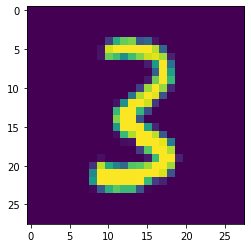

In [37]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [38]:
x_train = x_train.reshape(-1,28*28) / 255
x_train.shape

(60000, 784)

In [39]:
x_test = x_test.reshape(-1, 28*28) / 255
x_test.shape

(10000, 784)

In [40]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [41]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model 

In [42]:
import tensorflow as tf

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 3이상 --> softmax, binary --> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer 

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [44]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3286 - acc: 0.9053 - val_loss: 0.1939 - val_acc: 0.9408
Epoch 2/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1509 - acc: 0.9546 - val_loss: 0.1692 - val_acc: 0.9513
Epoch 3/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1081 - acc: 0.9673 - val_loss: 0.1253 - val_acc: 0.9631
Epoch 4/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0848 - acc: 0.9740 - val_loss: 0.1299 - val_acc: 0.9614
Epoch 5/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0677 - acc: 0.9783 - val_loss: 0.1138 - val_acc: 0.9663
Epoch 6/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0536 - acc: 0.9826 - val_loss: 0.1279 - val_acc: 0.9656
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0456 - acc: 0.9851 - val_loss: 0.1200 - val_acc: 0.9657
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [45]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

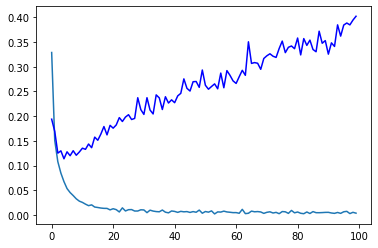

In [46]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

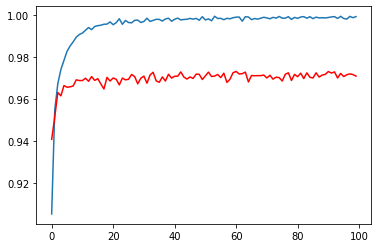

In [47]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [48]:
#x_test[30]

In [49]:
import numpy as np
# np.set_printoptions(precision=8)

pred = model.predict(x_test[30:31])
pred

array([[0.0000000e+00, 0.0000000e+00, 4.3517783e-38, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.8812565e-38]], dtype=float32)

In [50]:
np.argmax(pred, axis=1)

array([3])

In [51]:
y_test[30]

3

In [52]:
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a, axis=0)

[[10 11 12]
 [13 14 15]]


array([1, 1, 1])

In [53]:
np.argmax(np.array([[10,11,12]]), axis=1)

array([2])

In [58]:
import numpy as np
# np.set_printoptions(precision=8)

pred = model.predict(x_test[30:31])
pred, np.argmax(pred)

(array([[0.0000000e+00, 0.0000000e+00, 4.3517783e-38, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 3.8812565e-38]], dtype=float32), 3)

In [54]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [55]:
model.save('./model_save01.h5')

In [57]:
model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [60]:
load_pred = model_load.predict(x_test[30:31])
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 0.0000000e+00, 4.3517783e-38, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 3.8812565e-38]], dtype=float32), 3)